In [ ]:
#Installing apyori
!pip install apyori


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=d46d98acf84a7db853ef050dec61a5eb2112808d614ad833e6195e5f24a7bf67
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
#Uploding file to google collab
from google.colab import files
uploaded = files.upload()
import pandas as pd



Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
# importing necessary libraries
from apyori import apriori # for apriori algorithm
import numpy as np # for linear algebra
import pandas as pd # for Data pre-processing and manipulation
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
from sklearn.preprocessing import LabelEncoder # for encoding categorial label as numbers
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth# for association rule extraction
from mlxtend.preprocessing import TransactionEncoder# transforming data in one-hot frame
import time# for teacking execution time
import networkx as nx #for creating and visulaizing network graphs
from itertools import combinations

import warnings #for controlling waring message
from sklearn.ensemble import IsolationForest # to treat any anomanly or ouliters
warnings.filterwarnings('ignore')



In [ ]:
#Understand the Dataset
#Reading the file
df = pd.read_csv('Groceries_dataset.csv')
df.head(50)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [ ]:
#To show all the datatypes
print("Groceries dataframe informantion")
df.info()



Groceries dataframe informantion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
#To show summery of all columns of the data file
print("Groceries dataframe summary of all columns")
df.describe(include= 'all')

Groceries dataframe summary of all columns


,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


In [ ]:
#To show Dataset total rows and columns
print("Groceries Dataset total rows and columns")
df.shape


Groceries Dataset total rows and columns


(38765, 3)

In [ ]:
#To show list of column names in the dataframe
print("list of column names in the Groceries dataframe ")
df.columns

list of column names in the Groceries dataframe 


Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [ ]:
#to check if the null vlaues are there or not
df.isnull().sum().sort_values(ascending=False)



,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
#Data Preprocessing

In [ ]:
#Data Cleaning


In [ ]:
#Handaling missing values
print("Handeling Missing Values Before")
print(df.isnull().sum().sum())
print(df.isnull().sum())
print(df.isnull().any(axis=1))
df.dropna(inplace=True)
print ("Handeling Missing Values after")
print(df.isnull().sum())


Handeling Missing Values Before
0
Member_number      0
Date               0
itemDescription    0
dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool
Handeling Missing Values after
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [ ]:
#Data imputation
print("Since there is no missing values in cloumns data imputaion is not needed")


Since there is no missing values in cloumns data imputaion is not needed


In [ ]:
 #Number of unique products in the item Description column
print("Number of unique products in the item Description column")
print(f"There are total of {len(df.itemDescription.value_counts())} unique products.")


Number of unique products in the item Description column
There are total of 167 unique products.


In [ ]:

#Removing Duplicate files
print("To check if there is any duplicate files or not:")
print (df.duplicated().any())
print(df.duplicated().sum())


print(df.drop_duplicates(inplace=True))
print("Since all the data are unique removing Duplicate files is not needed")


To check if there is any duplicate files or not:
True
759
None
Since all the data are unique removing Duplicate files is not needed


In [ ]:
#Fixing the datatypes
print ("Checking the current data types:")
print(df.dtypes)
print("Converting 'Date' column to a 'Datetime' format using pandas")
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

Checking the current data types:
Member_number       int64
Date               object
itemDescription    object
dtype: object
Converting 'Date' column to a 'Datetime' format using pandas


In [ ]:
#Standardlizing the formats
print("lowercasing all the string cloumns\n")
df['itemDescription'] = df['itemDescription'].str.lower().str.strip()
df.head
print(df.head())

lowercasing all the string cloumns

   Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk


In [ ]:
#Converting the data
# label Encoding
label_encoder = LabelEncoder()
df['item_class'] = label_encoder.fit_transform(df['itemDescription'])
print("\nLabel Encoded Data:\n", df['item_class'])


Label Encoded Data:
 0        155
1        164
2        108
3        101
4        164
        ... 
38760    134
38761     17
38762     15
38763     62
38764     22
Name: item_class, Length: 38006, dtype: int64


In [ ]:

#clean data
print("Clean Data")
df.info()
df.head()


Clean Data
<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   item_class       38006 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.4+ MB


,Member_number,Date,itemDescription,item_class
0,1808,2015-07-21,tropical fruit,155
1,2552,2015-01-05,whole milk,164
2,2300,2015-09-19,pip fruit,108
3,1187,2015-12-12,other vegetables,101
4,3037,2015-02-01,whole milk,164


In [ ]:
#EDA

In [ ]:
#grouping transation by member and date
print("grouping transation by member and date")
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
print(transactions.head())


grouping transation by member and date
Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
Name: itemDescription, dtype: object


In [ ]:
#number of transactions in transactions datasets
len(transactions)



14963

In [ ]:
#transaction of  costumer basket
print("transaction of costumer basket")
transactions

transaction of costumer basket


Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
                                                   ...                        
4999           2015-05-16                    [butter milk, whipped/sour cream]
               2015-12-26                               [bottled water, herbs]
5000           2014-03-09                      [fruit/vegetable juice, onions]
               2014-11-16                     [bottled beer, other vegetables]
               2015-02-10         [soda, root vegetables, semi-finished bread]
Name: itemDescription, Length: 14963, dtype: object

In [ ]:
#Encoding the Transactions
print("Encoding the Transactions")
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_df = pd.DataFrame(transactions_matrix, columns=te.columns_)
encoded_df = encoded_df.replace(-1, 0)
encoded_df = encoded_df.astype(bool)
encoded_df = encoded_df[encoded_df.sum(axis=1) > 0]
print(encoded_df)

Encoding the Transactions
       abrasive cleaner  artif. sweetener  baby cosmetics   bags  \
0                 False             False           False  False   
1                 False             False           False  False   
2                 False             False           False  False   
3                 False             False           False  False   
4                 False             False           False  False   
...                 ...               ...             ...    ...   
14958             False             False           False  False   
14959             False             False           False  False   
14960             False             False           False  False   
14961             False             False           False  False   
14962             False             False           False  False   

       baking powder  bathroom cleaner   beef  berries  beverages  \
0              False             False  False    False      False   
1              Fals

converting dataframe values from boolens to integers


,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Treating outliners using Isolation Forest METHOD
print("\nRunning Isolation Forest to detect outliers...")
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_pred = iso_forest.fit_predict(encoded_df)
encoded_df['outlier'] = outlier_pred
cleaned_encoded_df = encoded_df[encoded_df['outlier'] != -1].drop('outlier', axis=1)
cleaned_encoded_df = cleaned_encoded_df.astype(bool)
print(cleaned_encoded_df.head(10))



Running Isolation Forest to detect outliers...
   abrasive cleaner  artif. sweetener  baby cosmetics   bags  baking powder  \
0             False             False           False  False          False   
1             False             False           False  False          False   
2             False             False           False  False          False   
3             False             False           False  False          False   
4             False             False           False  False          False   
5             False             False           False  False          False   
6             False             False           False  False          False   
7             False             False           False  False          False   
8             False             False           False  False          False   
9             False             False           False  False          False   

   bathroom cleaner   beef  berries  beverages  bottled beer  ...  uht-milk  \
0  

In [ ]:
# After Isolation Forest outlier detection
encoded_df['outlier'] = iso_forest.fit_predict(encoded_df)

# Filter outliers and drop 'outlier' column
cleaned_encoded_df = encoded_df[encoded_df['outlier'] != -1].drop('outlier', axis=1)

# Replace any -1 values if they exist
cleaned_encoded_df = cleaned_encoded_df.replace(-1, 0)

# Double check
print("Any -1 values after cleaning?", (cleaned_encoded_df == -1).sum().sum())

# Run apriori only on clean data
freqitems_apriori = apriori(cleaned_encoded_df, min_support=0.001, use_colnames=True)

Any -1 values after cleaning? 0


In [ ]:
# Monthly purchase Trend
df_date=df.set_index(['Date'])
df_date


,Member_number,itemDescription,item_class
Date,,,
2015-07-21,1808,tropical fruit,155
2015-01-05,2552,whole milk,164
2015-09-19,2300,pip fruit,108
2015-12-12,1187,other vegetables,101
2015-02-01,3037,whole milk,164
...,...,...,...
2014-10-08,4471,sliced cheese,134
2014-02-23,2022,candy,17
2014-04-16,1097,cake bar,15


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

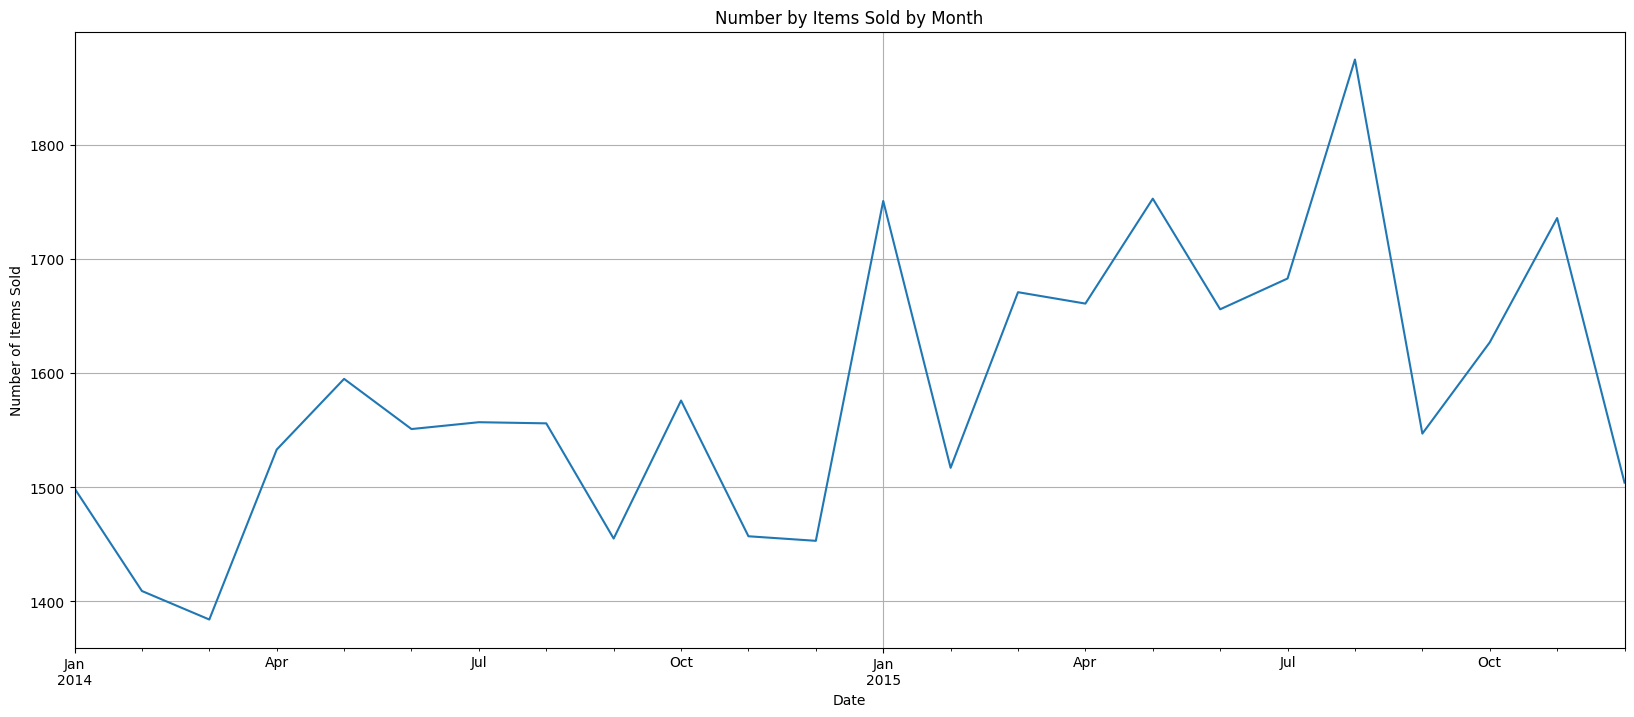

In [ ]:
#montlhy iteam sales as per time series chart
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [ ]:
# Average Transactions per costumers
transactions_per_customer = df['Member_number'].value_counts()
print("Average Transactions per Customer:", round(transactions_per_customer.mean(), 2))


Average Transactions per Customer: 9.75


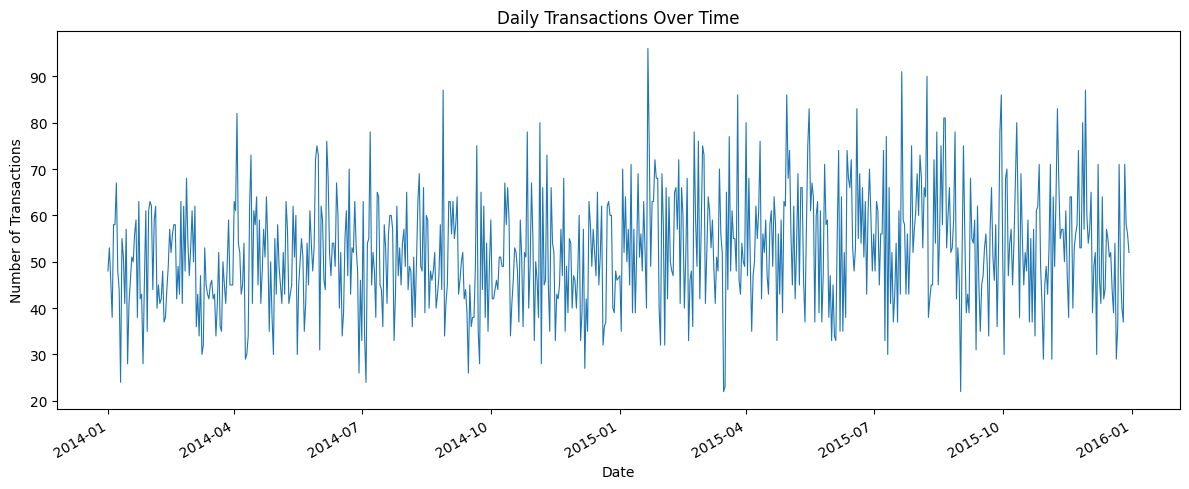

In [ ]:
#Daily Transations Volume
daily_items = df.groupby('Date').size()
plt.figure(figsize=(12, 5))
daily_items.plot(kind='line', linewidth=0.8)
plt.title("Daily Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

In [ ]:
#Apriori Implemtation

In [ ]:
#Data Preparation
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level



,Member_number,itemDescription
19727,5000,root vegetables
9340,5000,bottled beer
11728,5000,fruit/vegetable juice
3578,5000,soda
34885,5000,semi-finished bread
...,...,...
17778,1000,pickled vegetables
24544,1000,yogurt
29480,1000,pastry
22537,1000,hygiene articles


In [ ]:
#creating transation list
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [ ]:
#Running apriori to get frequent itemset
start_time = time.time()
#generating frequent itemset using apriori

freqitems_apriori = apriori(cleaned_encoded_df, min_support=0.001, use_colnames=True)

apriori_execution_time = time.time() - start_time
print(f"Apriori Execution Time: {execution_time:.4f} seconds")

Apriori Execution Time: 0.7878 seconds


In [ ]:
#using association rules from apriori itemset
rules = association_rules(freqitems_apriori, metric="confidence", min_threshold=0.1)
print (rules.head())

      antecedents         consequents  antecedent support  consequent support  \
0          (beef)        (whole milk)            0.032944            0.155877   
1       (berries)  (other vegetables)            0.021265            0.120772   
2     (beverages)              (soda)            0.016269            0.095727   
3     (beverages)        (whole milk)            0.016269            0.155877   
4  (bottled beer)        (whole milk)            0.044218            0.155877   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.004186    0.127049  0.815063               1.0 -0.000950    0.966977   
1  0.002498    0.117460  0.972577               1.0 -0.000070    0.996247   
2  0.001688    0.103734  1.083652               1.0  0.000130    1.008935   
3  0.001890    0.116183  0.745350               1.0 -0.000646    0.955088   
4  0.006818    0.154198  0.989234               1.0 -0.000074    0.998016   

   zhangs_metric   jaccard  certainty  kulczynski 

In [ ]:
#Generating Association rules from frequent itemset
rules = association_rules(freqitems_apriori, metric="confidence", min_threshold=0.1,num_itemsets=3)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.032944,0.155877,0.004186,0.127049,0.815063,1.0,-0.000950,0.966977,-0.190040,0.022669,-0.034151,0.076950
1,(berries),(other vegetables),0.021265,0.120772,0.002498,0.117460,0.972577,1.0,-0.000070,0.996247,-0.028002,0.017900,-0.003767,0.069071
2,(beverages),(soda),0.016269,0.095727,0.001688,0.103734,1.083652,1.0,0.000130,1.008935,0.078471,0.015300,0.008855,0.060682
3,(beverages),(whole milk),0.016269,0.155877,0.001890,0.116183,0.745350,1.0,-0.000646,0.955088,-0.257776,0.011102,-0.047024,0.064155
4,(bottled beer),(whole milk),0.044218,0.155877,0.006818,0.154198,0.989234,1.0,-0.000074,0.998016,-0.011258,0.035278,-0.001988,0.098970
5,(bottled water),(whole milk),0.060285,0.155877,0.006953,0.115342,0.739954,1.0,-0.002444,0.954180,-0.272188,0.033237,-0.048020,0.079975
6,(brown bread),(whole milk),0.036724,0.155877,0.004253,0.115809,0.742952,1.0,-0.001471,0.954684,-0.264258,0.022581,-0.047467,0.071547
7,(butter),(whole milk),0.034429,0.155877,0.004456,0.129412,0.830219,1.0,-0.000911,0.969601,-0.174776,0.023974,-0.031352,0.078998
8,(candy),(whole milk),0.014244,0.155877,0.002025,0.142180,0.912132,1.0,-0.000195,0.984033,-0.089024,0.012048,-0.016226,0.077586
9,(canned beer),(whole milk),0.045298,0.155877,0.005536,0.122206,0.783990,1.0,-0.001525,0.961641,-0.223964,0.028295,-0.039889,0.078859


In [ ]:
#sorting association rule by confident and lift in decensing order
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(semi-finished bread),(whole milk),0.009316,0.155877,0.001620,0.173913,1.115710,1.0,0.000168,1.021834,0.104685,0.009905,0.021367,0.092154
4,(bottled beer),(whole milk),0.044218,0.155877,0.006818,0.154198,0.989234,1.0,-0.000074,0.998016,-0.011258,0.035278,-0.001988,0.098970
21,(detergent),(whole milk),0.008371,0.155877,0.001283,0.153226,0.982994,1.0,-0.000022,0.996870,-0.017147,0.007871,-0.003140,0.080727
89,"(rolls/buns, soda)",(other vegetables),0.007561,0.120772,0.001148,0.151786,1.256793,1.0,0.000234,1.036563,0.205880,0.009023,0.035273,0.080644
71,(seasonal products),(rolls/buns),0.006953,0.108013,0.001013,0.145631,1.348271,1.0,0.000262,1.044030,0.260118,0.008886,0.042173,0.077503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,(uht-milk),(other vegetables),0.021130,0.120772,0.002160,0.102236,0.846522,1.0,-0.000392,0.979353,-0.156273,0.015459,-0.021082,0.060062
30,(fruit/vegetable juice),(rolls/buns),0.033214,0.108013,0.003375,0.101626,0.940866,1.0,-0.000212,0.992890,-0.061041,0.024486,-0.007161,0.066438
56,(shopping bags),(other vegetables),0.046783,0.120772,0.004726,0.101010,0.836368,1.0,-0.000925,0.978017,-0.170295,0.029022,-0.022477,0.070069
57,(sliced cheese),(other vegetables),0.013434,0.120772,0.001350,0.100503,0.832165,1.0,-0.000272,0.977465,-0.169732,0.010163,-0.023054,0.055841


In [ ]:
#FP-Growth
encoded_df = encoded_df.replace(-1, 0)
encoded_df = encoded_df.astype(bool)
encoded_df = encoded_df[encoded_df.sum(axis=1) > 0]

start_time = time.time()

feqitems_fp = fpgrowth(encoded_df, min_support=0.001, use_colnames=True)
print(feqitems_fp.head())
fp_execution_time = time.time() - start_time
# Print the execution time
print(f"FP-Growth Execution Time: {fp_execution_time:.4f} seconds")

    support       itemsets
0  0.989975      (outlier)
1  0.157923   (whole milk)
2  0.051728       (pastry)
3  0.018780  (salty snack)
4  0.085879       (yogurt)
FP-Growth Execution Time: 60.2955 seconds


In [ ]:
#Sorting dataframe column in decending order
feqitems_fp.sort_values(by= "support",ascending=False)

,support,itemsets
0,0.989975,(outlier)
1,0.157923,(whole milk)
150,0.154314,"(outlier, whole milk)"
18,0.122101,(other vegetables)
451,0.119562,"(outlier, other vegetables)"
...,...,...
1369,0.001002,"(soda, chewing gum)"
1416,0.001002,"(outlier, cooking chocolate)"
1410,0.001002,"(outlier, ready soups)"
1409,0.001002,"(seasonal products, rolls/buns, outlier)"


In [ ]:
#first 10 association rules with confidence ≥ 0.1
print("first 10 association rules with confidence ≥ 0.1")
rules_fpgrowth = association_rules(feqitems_fp, metric='confidence', min_threshold=0.1,num_itemsets=3)
rules_fpgrowth.head(10)

first 10 association rules with confidence ≥ 0.1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(outlier),(whole milk),0.989975,0.157923,0.154314,0.155877,0.987043,1.0,-0.002026,0.997576,-0.567009,0.155310,-0.002430,0.566512
1,(whole milk),(outlier),0.157923,0.989975,0.154314,0.977148,0.987043,1.0,-0.002026,0.438675,-0.015350,0.155310,-1.279594,0.566512
2,(pastry),(outlier),0.051728,0.989975,0.050926,0.984496,0.994465,1.0,-0.000283,0.646595,-0.005835,0.051400,-0.546563,0.517969
3,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,1.0,-0.001686,0.962729,-0.215266,0.031908,-0.038714,0.083186
4,"(outlier, pastry)",(whole milk),0.050926,0.157923,0.006215,0.122047,0.772828,1.0,-0.001827,0.959137,-0.236479,0.030673,-0.042604,0.080702
5,"(pastry, whole milk)",(outlier),0.006483,0.989975,0.006215,0.958763,0.968472,1.0,-0.000202,0.243100,-0.031728,0.006277,-3.113540,0.482521
6,(pastry),"(outlier, whole milk)",0.051728,0.154314,0.006215,0.120155,0.778640,1.0,-0.001767,0.961176,-0.230650,0.031104,-0.040392,0.080216
7,"(root vegetables, pastry)",(outlier),0.002874,0.989975,0.002606,0.906977,0.916161,1.0,-0.000239,0.107766,-0.084060,0.002632,-8.279380,0.454805
8,"(pastry, other vegetables)",(outlier),0.003676,0.989975,0.003342,0.909091,0.918297,1.0,-0.000297,0.110272,-0.081980,0.003374,-8.068485,0.456233
9,"(yogurt, pastry)",(outlier),0.003609,0.989975,0.003542,0.981481,0.991420,1.0,-0.000031,0.541335,-0.008611,0.003578,-0.847284,0.492530


In [ ]:
#sorting the rules by confidence and lift in descending order
print("sorting the rules by confidence and lift in descending order")
rules_fpgrowth = rules_fpgrowth.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_fpgrowth

sorting the rules by confidence and lift in descending order


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
14,"(pastry, bottled water)",(outlier),0.002874,0.989975,0.002874,1.000000,1.010126,1.0,0.000029,inf,0.010054,0.002903,1.000000,0.501451
67,"(semi-finished bread, other vegetables)",(outlier),0.001002,0.989975,0.001002,1.000000,1.010126,1.0,0.000010,inf,0.010035,0.001013,1.000000,0.500506
85,"(soda, other vegetables, rolls/buns)",(outlier),0.001136,0.989975,0.001136,1.000000,1.010126,1.0,0.000011,inf,0.010036,0.001148,1.000000,0.500574
176,"(beef, butter)",(outlier),0.001136,0.989975,0.001136,1.000000,1.010126,1.0,0.000011,inf,0.010036,0.001148,1.000000,0.500574
182,"(beef, bottled water)",(outlier),0.001337,0.989975,0.001337,1.000000,1.010126,1.0,0.000013,inf,0.010038,0.001350,1.000000,0.500675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,"(outlier, ice cream)",(rolls/buns),0.014636,0.110005,0.001470,0.100457,0.913203,1.0,-0.000140,0.989386,-0.087973,0.011937,-0.010728,0.056911
770,(soft cheese),(rolls/buns),0.010025,0.110005,0.001002,0.100000,0.909052,1.0,-0.000100,0.988884,-0.091784,0.008422,-0.011241,0.054557
928,(chewing gum),"(outlier, yogurt)",0.012030,0.083940,0.001203,0.100000,1.191322,1.0,0.000193,1.017844,0.162552,0.012694,0.017531,0.057166
595,(uht-milk),"(outlier, other vegetables)",0.021386,0.119562,0.002139,0.100000,0.836389,1.0,-0.000418,0.978265,-0.166591,0.015407,-0.022218,0.058944


In [ ]:
#Brute force
def brute_force_frequent_itemsets(df, min_support=0.01, max_len=2):
    print("Running optimized brute-force frequent itemset mining...")
    start_time = time.time()

    total_transactions = len(df)
    items = df.columns.tolist()
    frequent_itemsets = []

    for k in range(1, max_len + 1):
        for itemset in combinations(items, k):
            match = df[list(itemset)].all(axis=1)
            support = match.sum() / total_transactions
            if support >= min_support:
                frequent_itemsets.append({'itemsets': frozenset(itemset), 'support': support})

    brute_execution_time = time.time() - start_time
    print(f"Brute Force Execution Time: {brute_execution_time:.4f} seconds")

    return pd.DataFrame(frequent_itemsets), brute_execution_time

freqitems_brute, brute_execution_time = brute_force_frequent_itemsets(
    cleaned_encoded_df,
    min_support=0.01,
    max_len=2
)

print(freqitems_brute.head())

Running optimized brute-force frequent itemset mining...
Brute Force Execution Time: 14.5386 seconds
          itemsets   support
0           (beef)  0.032944
1        (berries)  0.021265
2      (beverages)  0.016269
3   (bottled beer)  0.044218
4  (bottled water)  0.060285


In [ ]:

#Encoding into binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
binary_df = pd.DataFrame(te_ary, columns=te.columns_)



In [ ]:
# To check the frequent itemset in brunte force
frequent_itemsets = fpgrowth(binary_df, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head)

<bound method NDFrame.head of        support                               itemsets
0     0.458184                           (whole milk)
1     0.313494                                 (soda)
2     0.282966                               (yogurt)
3     0.206003                              (sausage)
4     0.177527                               (pastry)
...        ...                                    ...
3011  0.013340        (seasonal products, whole milk)
3012  0.010262        (seasonal products, rolls/buns)
3013  0.010005  (seasonal products, other vegetables)
3014  0.010005                 (soda, frozen dessert)
3015  0.012057           (whole milk, frozen dessert)

[3016 rows x 2 columns]>


In [ ]:
#genertaing association rule with min confidence thresehold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules.head)

<bound method NDFrame.head of               antecedents         consequents  antecedent support  \
0                  (soda)        (whole milk)            0.313494   
1            (whole milk)              (soda)            0.458184   
2                  (soda)        (rolls/buns)            0.313494   
3            (rolls/buns)              (soda)            0.349666   
4                  (soda)  (other vegetables)            0.313494   
...                   ...                 ...                 ...   
9724  (seasonal products)        (whole milk)            0.025911   
9725  (seasonal products)        (rolls/buns)            0.025911   
9726  (seasonal products)  (other vegetables)            0.025911   
9727     (frozen dessert)              (soda)            0.023089   
9728     (frozen dessert)        (whole milk)            0.023089   

      consequent support   support  confidence      lift  representativity  \
0               0.458184  0.151103    0.481997  1.051973       

In [ ]:
#sorting rules by confident and lift in decensing order in burnte force
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print(rules_sorted.head(10))

                                            antecedents   consequents  \
8530                              (meat, domestic eggs)  (whole milk)   
4968                 (fruit/vegetable juice, chocolate)  (whole milk)   
5401  (yogurt, rolls/buns, other vegetables, bottled...  (whole milk)   
4204                 (yogurt, bottled water, pip fruit)  (whole milk)   
7998                  (yogurt, rolls/buns, brown bread)  (whole milk)   
8185     (brown bread, other vegetables, bottled water)  (whole milk)   
5794                 (bottled beer, yogurt, rolls/buns)  (whole milk)   
2375                               (yogurt, soda, curd)  (whole milk)   
4676  (yogurt, rolls/buns, shopping bags, other vege...  (whole milk)   
4153                        (yogurt, pastry, pip fruit)  (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
8530            0.013084            0.458184  0.010262    0.784314  1.711789   
4968            0.014366            

In [ ]:
#Visulization

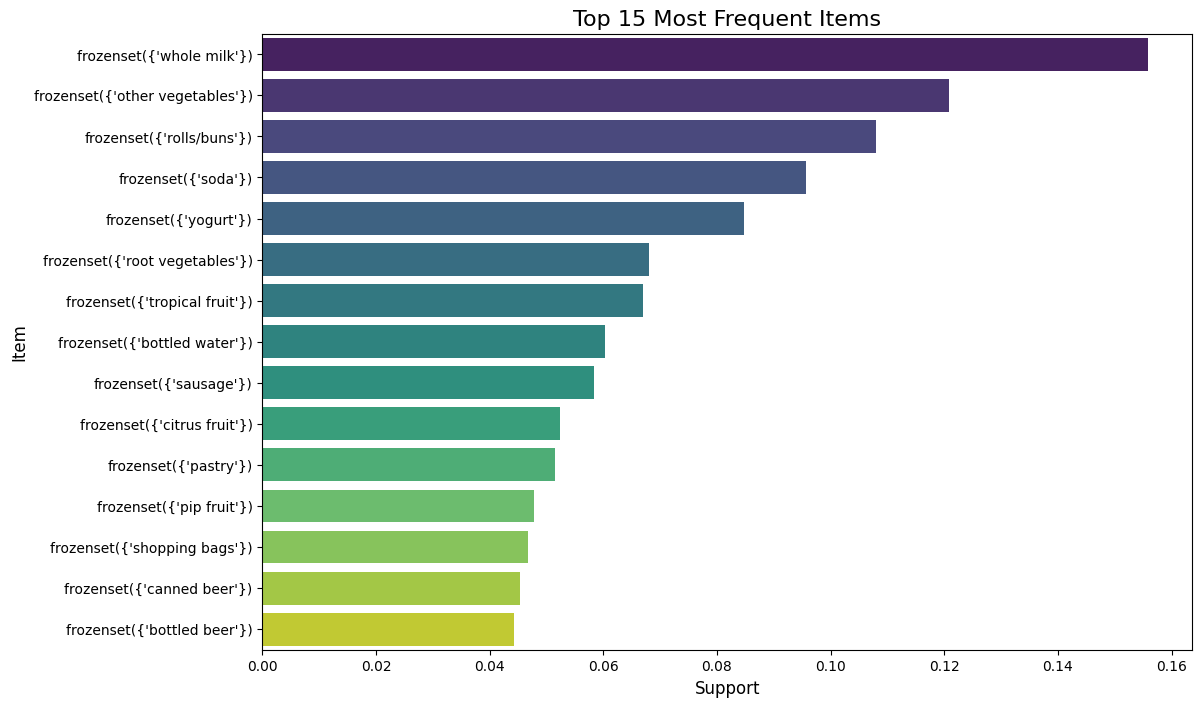

In [ ]:
#Bar char for top 15 frequentitems sold using apriori
top_items = freqitems_apriori[freqitems_apriori['itemsets'].apply(lambda x: len(x) == 1)]
top_items = top_items.sort_values(by='support', ascending=False).head(15)
top_items['item'] = top_items['itemsets'].apply(lambda x: next(iter(x)))
plt.figure(figsize=(12, 8))
sns.barplot(x='support', y=top_items['itemsets'].astype(str), data=top_items, palette='viridis')
plt.title('Top 15 Most Frequent Items', fontsize=16)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Item', fontsize=12)
plt.show()

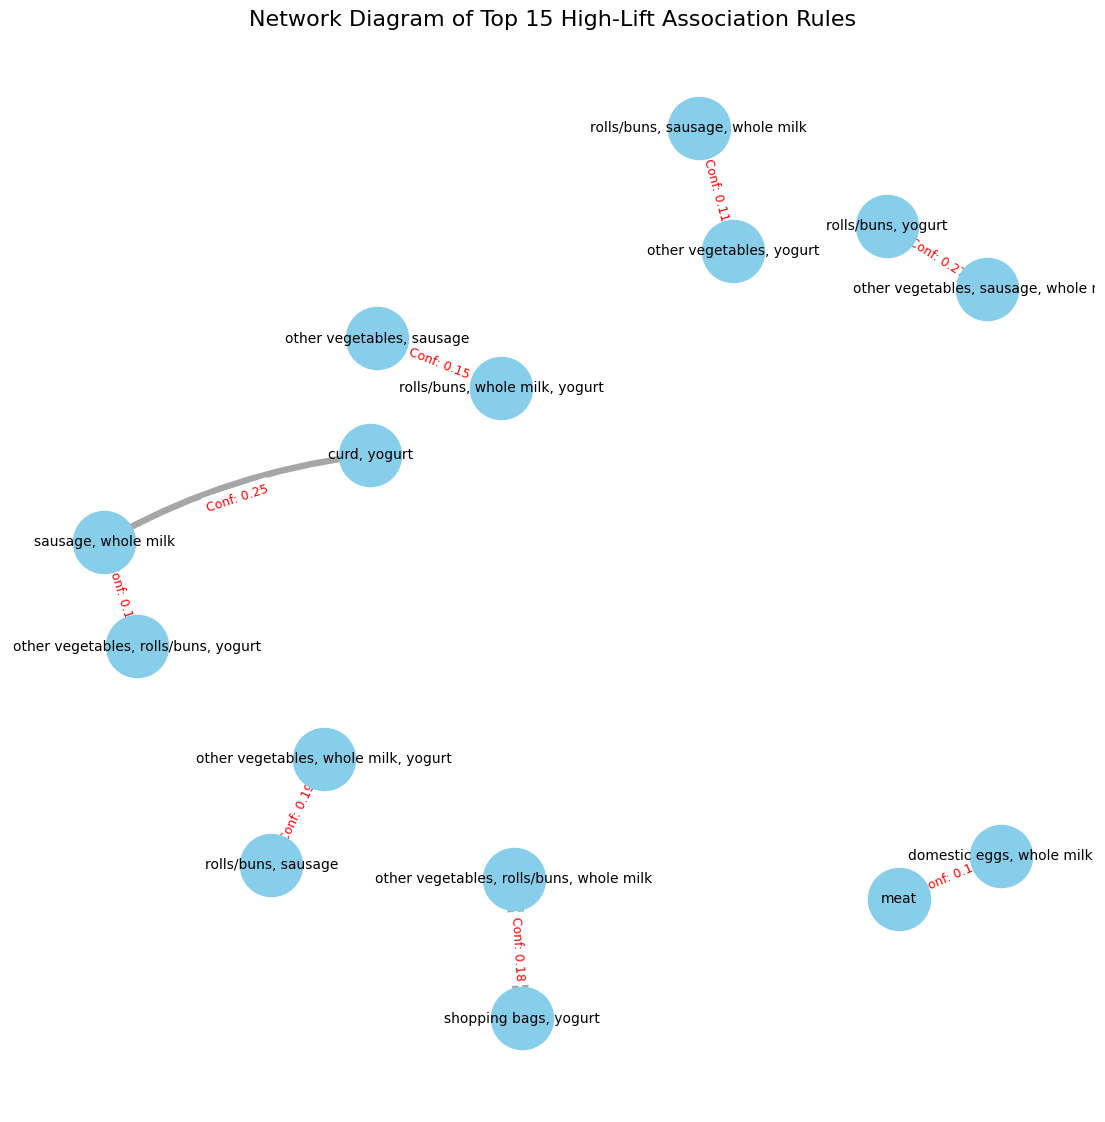

In [ ]:
#Network diagram
top_rules = rules.sort_values(by='lift', ascending=False).head(15).copy()


def set_to_str(s):
    return ', '.join(sorted(list(s)))

top_rules['antecedents_str'] = top_rules['antecedents'].apply(set_to_str)
top_rules['consequents_str'] = top_rules['consequents'].apply(set_to_str)


G = nx.from_pandas_edgelist(
    top_rules,
    source='antecedents_str',
    target='consequents_str',
    edge_attr=['confidence', 'lift'],
    create_using=nx.DiGraph()
)


for node in G.nodes():
    G.nodes[node]['label'] = node


plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.6, seed=42)


nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')


nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)


edge_width = [d['lift'] * 2 for (_, _, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.7, edge_color='gray', connectionstyle='arc3,rad=0.1')


edge_labels = nx.get_edge_attributes(G, 'confidence')
formatted_edge_labels = {k: f"Conf: {v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_edge_labels, font_color='red', font_size=9)


plt.title('Network Diagram of Top 15 High-Lift Association Rules', fontsize=16)
plt.axis('off')
plt.show()


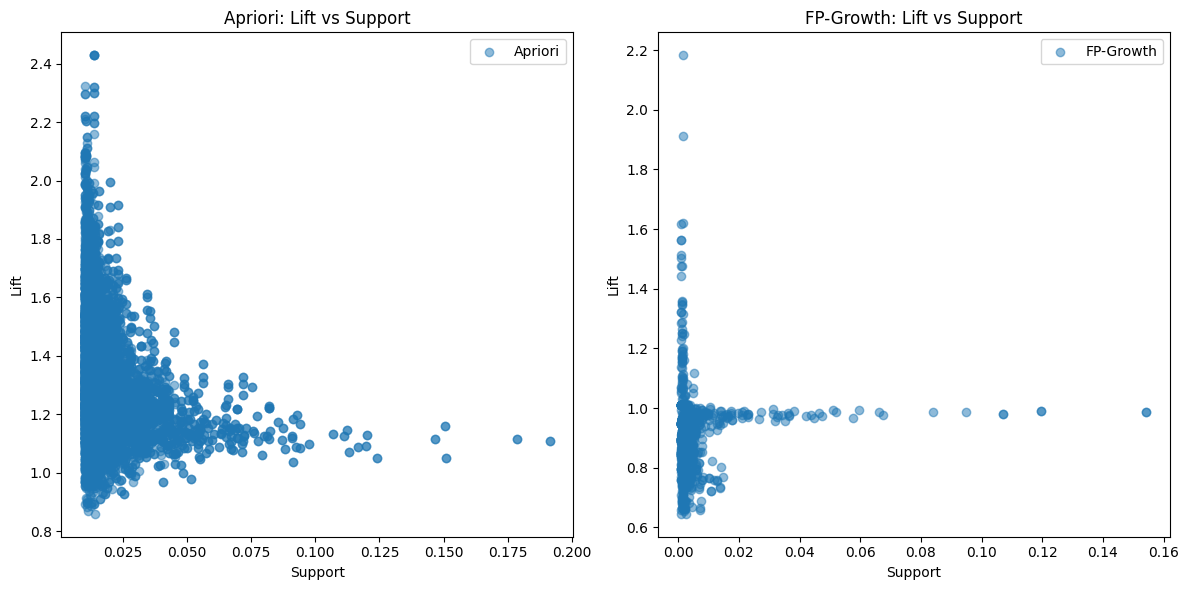

In [ ]:
#Support vs lift
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Apriori: Support vs Lift
ax[0].scatter(rules['support'], rules['lift'], label='Apriori', alpha=0.5)
ax[0].set_xlabel('Support')
ax[0].set_ylabel('Lift')
ax[0].set_title('Apriori: Lift vs Support')
ax[0].legend()

# Plot for FP-Growth: Support vs Lift
ax[1].scatter(rules_fpgrowth['support'], rules_fpgrowth['lift'], label='FP-Growth', alpha=0.5)
ax[1].set_xlabel('Support')
ax[1].set_ylabel('Lift')
ax[1].set_title('FP-Growth: Lift vs Support')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


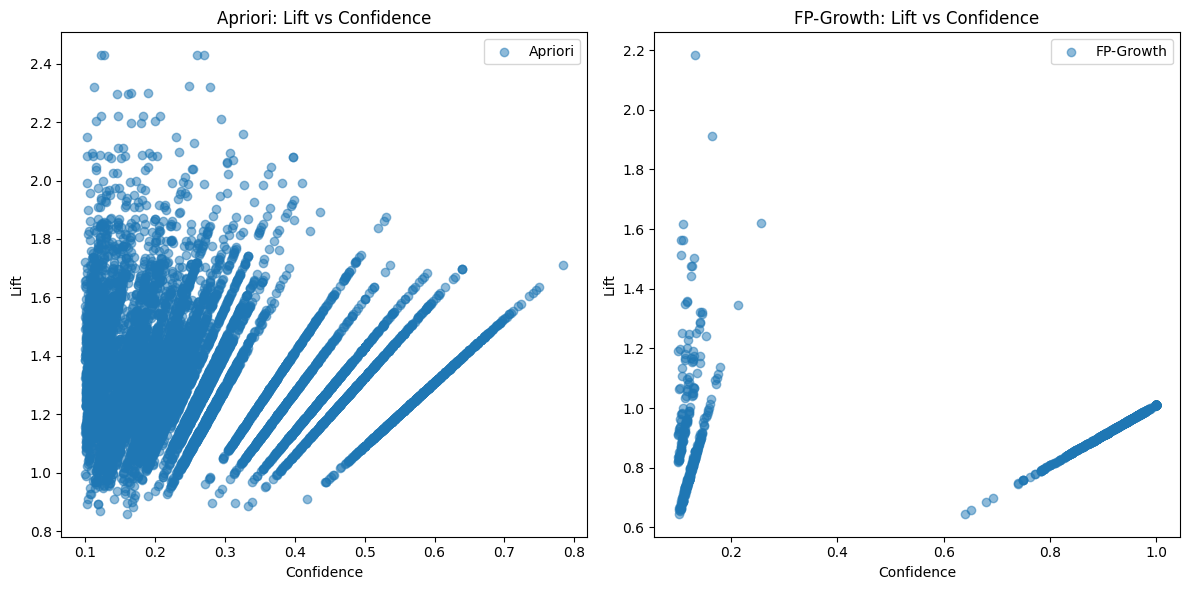

In [ ]:
#lift vs confident
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Apriori
ax[0].scatter(rules['confidence'], rules['lift'], label='Apriori', alpha=0.5)
ax[0].set_xlabel('Confidence')
ax[0].set_ylabel('Lift')
ax[0].set_title('Apriori: Lift vs Confidence')
ax[0].legend()

# Plot for FP-Growth
ax[1].scatter(rules_fpgrowth['confidence'], rules_fpgrowth['lift'], label='FP-Growth', alpha=0.5)
ax[1].set_xlabel('Confidence')
ax[1].set_ylabel('Lift')
ax[1].set_title('FP-Growth: Lift vs Confidence')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

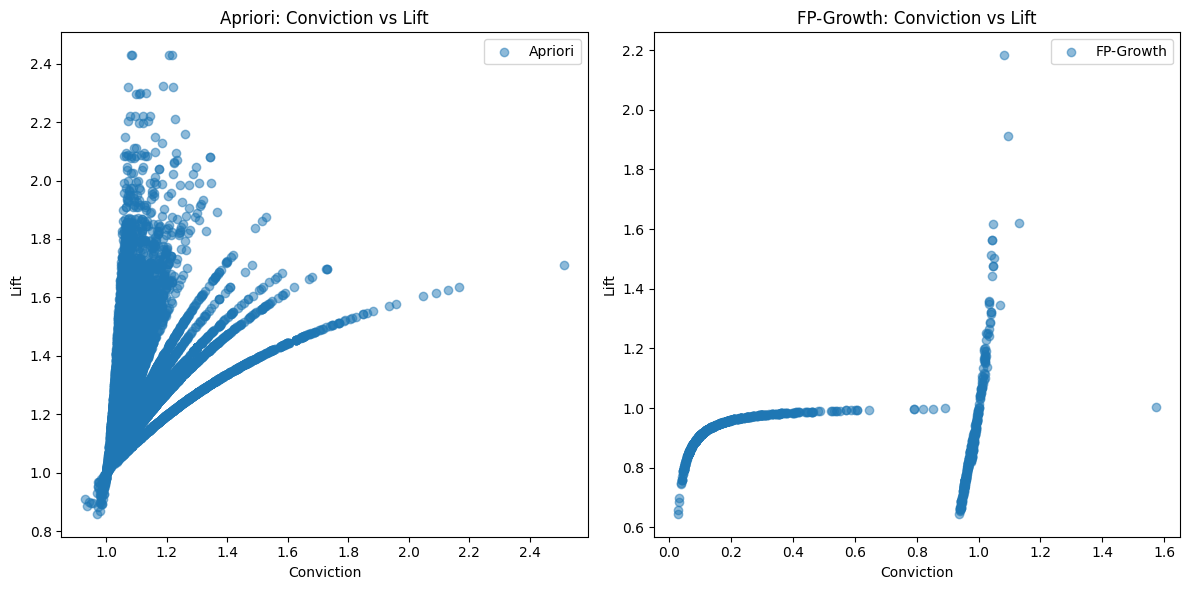

In [ ]:
#Conviction vs Lift
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for Apriori (Conviction vs Lift)
ax[0].scatter(rules['conviction'], rules['lift'], label='Apriori', alpha=0.5)
ax[0].set_xlabel('Conviction')
ax[0].set_ylabel('Lift')
ax[0].set_title('Apriori: Conviction vs Lift')
ax[0].legend()

# Plot for FP-Growth (Conviction vs Lift)
ax[1].scatter(rules_fpgrowth['conviction'], rules_fpgrowth['lift'], label='FP-Growth', alpha=0.5)
ax[1].set_xlabel('Conviction')
ax[1].set_ylabel('Lift')
ax[1].set_title('FP-Growth: Conviction vs Lift')
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

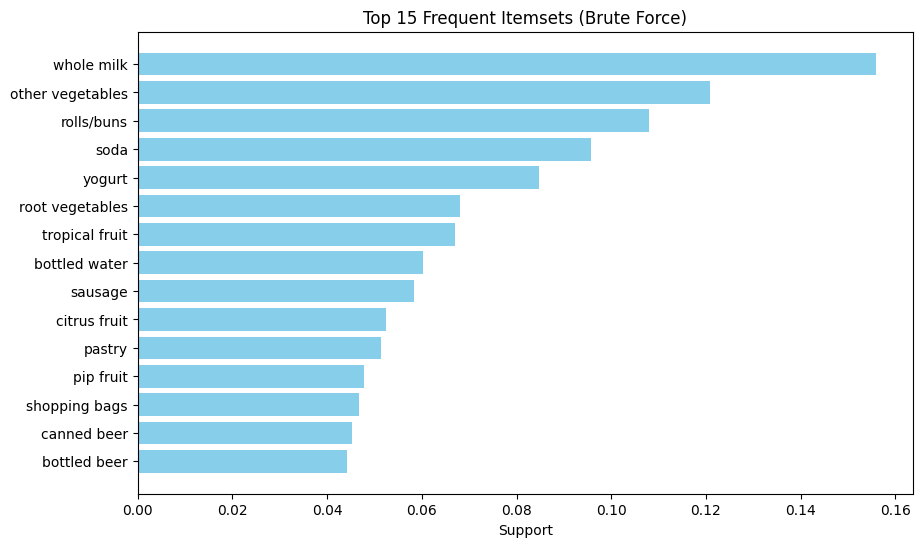

In [ ]:
#Top 15 frequent items according to the Brute Force
# Sort by support descending
freqitems_brute_sorted = freqitems_brute.sort_values(by='support', ascending=False).head(15)

# Convert frozenset to string for labels
freqitems_brute_sorted['itemset_str'] = freqitems_brute_sorted['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
plt.barh(freqitems_brute_sorted['itemset_str'], freqitems_brute_sorted['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 15 Frequent Itemsets (Brute Force)')
plt.gca().invert_yaxis()
plt.show()

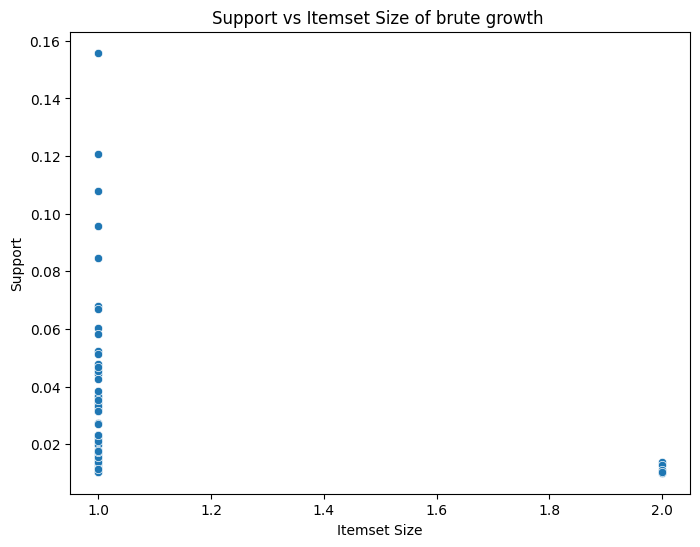

In [ ]:
#Scatter plot for Support vs Itemset Size of brute growth
# Add itemset size column
freqitems_brute['itemset_size'] = freqitems_brute['itemsets'].apply(len)

plt.figure(figsize=(8,6))
sns.scatterplot(data=freqitems_brute, x='itemset_size', y='support')
plt.title('Support vs Itemset Size of brute growth ')
plt.xlabel('Itemset Size')
plt.ylabel('Support')
plt.show()

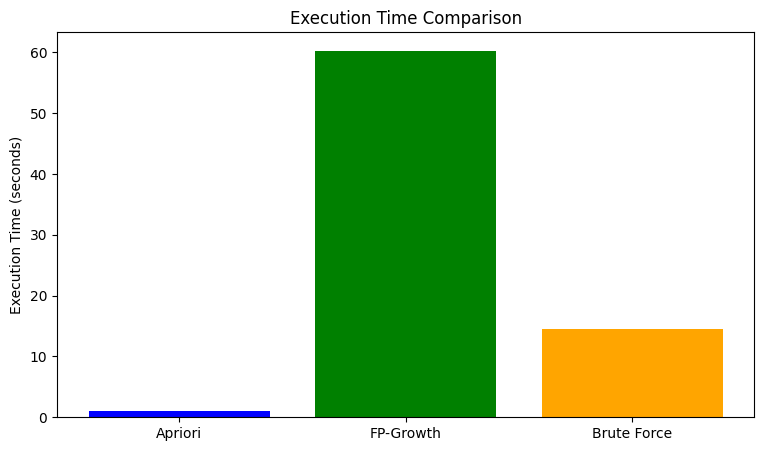

In [ ]:
#Comprasion of execution time between "Apriori", "FP-Growth", "Brute Force"
plt.figure(figsize=(9, 5))
plt.bar(
    ["Apriori", "FP-Growth", "Brute Force"],
    [apriori_execution_time, fp_execution_time, brute_execution_time],
    color=['blue', 'green', 'orange']
)
plt.title('Execution Time Comparison')
plt.ylabel('Execution Time (seconds)')
plt.show()
